<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 마켓에서 럭키백을 패션분야에 접목예정

패션분야이기 때문에 상품 개수 증가되고, 어종이 아닌 일반 잡화용으로 제공예정

In [ ]:
# 딥러닝의 시작인 인공신경망 사용

# MNIST 데이터 셋 : 손으로 쓴 0 ~ 9까지의 숫자로 이뤄져 있음
# 패션 MNIST 데이터 셋 : 숫자 대산 패션아이템으로 이뤄짐

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고, 텐서플로 연산을 결정적으로 만듦

import tensorflow as tf    # 탠서플로우 사용

tf.keras.utils.set_random_seed(42)    # 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드 사용
tf.config.experimental.enable_op_determinism()    # 파이참이나 다른곳에 버젼 오류해결용

# 케라스 패키지 import
from tensorflow import keras

# load_data()가 훈련세트와 테스트세트로 데이터를 나누어 반환(input과 target의 쌍으로 이루어짐)
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)    # 전달받은 데이터 크기 확인
# 60,000개의 데이터를 갖고 있으며 해상도는 28px x 28px

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)    # 테스트셋 데이터 크기 확인
# 10,000개 데이터와 해상도는 28px x 28px

(10000, 28, 28) (10000,)


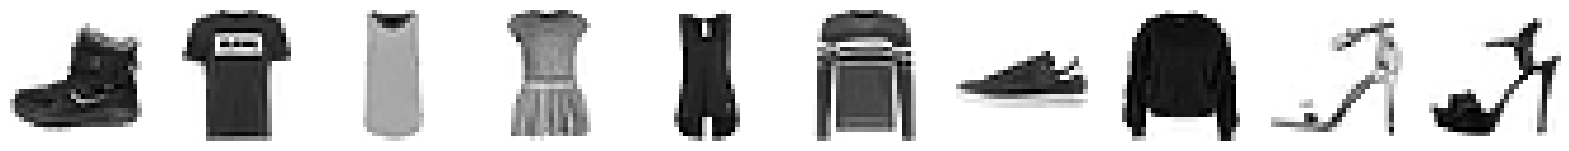

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (20, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])    # 샘플 타깃 확인
# 0 ~ 9까지 타깃 존재
# 0 : 티셔츠 / 1: 바지 / 2 : 스웨터 / 3 : 드레스 / 4 : 코트 / 5 : 샌달 / 6 : 셔츠 / 7 : 스니커즈 / 8 : 가방 / 9 : 앵클부츠

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np

print(np.unique(train_target, return_counts = True))
# 10개의 배열에 각각 정확히 6000개씩의 샘플이 들어있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# 로지스틱 회귀로 패션 아이템 분류

# 6만개 전체를 한번에 훈련하는는 것보다 샘플 1개씩 커내서 모델 훈련
# 확률적 경사 하강법 : SGDClassifier
# SGDClassifier를 사용할 때 표준화 전처리된 데이터 사용
# 확률적 경사하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
# 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실함수의 경사르 내려올 수 없음
# 패션 MNIST의 경우 흑백이기 떄문에 0 ~ 255 사이의 정수값을 가짐
# -> 255로 나누어 0 ~ 1 사이값으로 정규화진행(양수값으로 이루어진 이미지 전처리용)

# reshape으로 2차원 배열을 1차원 배열로 펼침
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)    # -1 : 모든 값
print(train_scaled.shape)    # SGDClassifier는 2차원 지원 안함 / 28 * 28 = 784

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state = 42)    # max_iter : 5번 반복
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)    # cross_validate : 교차검증
print(np.mean(scores['test_score']))    # 5번 반복에 대한 테스트 평균

0.8194166666666666


In [ ]:
# LogisticRegressor
# z = (a * weight) + (b * length) + (c * diagonal) + (d * height) + (e * width) + f

# 선형방정식
# z_티셔츠 = (a * 픽셀 1) + (b * 픽셀2) + (c * 픽셀3) + (d * 픽셀4) + .... + (e * 픽셀784) + f(절편)

# 바지에 대한 출력은 티셔츠와 다른 값을 사용해야함
# z_바지 = (a1 * 픽셀 1) + (b1 * 픽셀2) + (c1 * 픽셀3) + (d1 * 픽셀4) + .... + (e1 * 픽셀784) + f(절편)

# 나머지 클래스에 대한 선형 방정식도 동일 -> 10개의 클래스에 대한 선형 방정식을 모두 계산함
# 다음 단계인 소프트맥스 함수를 통과하여 각 클래스에 대한 확률을 얻을 수 있음

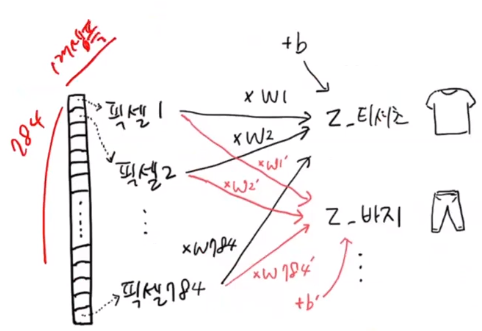

In [ ]:
# 인공신경망(Artificial Neural Network / ANN)을 사용하여 패션 아이템 분류 문제 성능 향상 도모
# 참고 URL / https://todayisbetterthanyesterday.tistory.com/41

# z_티셔츠 ~ 클래스 10개인 z_10까지 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종값은 출력층(output_layer)

# 인공신경망의 z값을 계산하는 단위는 뉴런(Neuron)이라고 부름 -> 선형계산을 진행(대부분 Unit이라고 부름)

# 픽셀 1 ~ 784번 픽셀까지를 입력층(input_layer)라고 부름

# z_1을 만들기 위하여 픽셀 1인 x_1에 곱해지는 가중치는 w_1.1 .... 10개의 뉴런
# 사람 뇌에 있는 뉴런과 다름(무언가를 만들어내는 것이 아니라 알고리즘의 일종)
# 확률적 경사 하강법을 사용한 로지스틱 회귀모델이 가장 간단한 인공신경망이라면 인공신경망을 만들어도 성능이 좋아지지 않음

In [ ]:
# 딥러닝 라이브러리 중 가장 많이 사용되는 텐서플로우 사용

# TensorFlow
# 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리 -> 알파고 시절
# TensorFlow 2.x 버전이 2019년 9월이 release됨

import tensorflow as tf
from tensorflow import keras    # 케라스 : 고수준 api
# 딥러닝 라이브러리는 GPU(그래픽카드) 사용하여 인공신경망을 훈련함
# GPU는 벡터와 행렬 연산으로 3D연산에 최적화되어 있어 곱셈과 덧셈이 많이 수행되는 인공신망망의 속도 향상 가능
# 케라스 라이브러리는 직접 GPU 연산을 수행하지 않으나, 다신 GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용함
# 텐서플로우가 케라스 백엔드로 사용가능 -> 멀티-백엔드 케라스라고 부름
# 케라스 API만 익히면 다양한 딥러닝 라이브러리를 입맛대로 골라서 사용가능(직관적이고 사용하기 편함)

In [ ]:
# 인공신경망으로 모델 생성 : 앞에서 만든 train_scaled, train_target 사용
# 인공신경망에서는 교차 검증을 사용하지 않고 검증세트를 별도로 덜어내어 사용
    # 이유 1 : 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
    # 이유 2 : 교차 검증을 수행하기에는 훈련시간이 너무 오래 걸림 -> plt 시간이 몇시간 ~ 몇일이 걸릴 수 있음

from sklearn.model_selection import train_test_split

# train_scaled, val_scaled의 비율 8 : 2 / train_target, val_target의 비율 8 : 2
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

print(train_scaled.shape, train_target.shape)    # 훈련세트 샘플 48,000개
print(val_scaled.shape, val_target.shape)    # 검증세트 샘플 12,000개

(48000, 784) (48000,)
(12000, 784) (12000,)


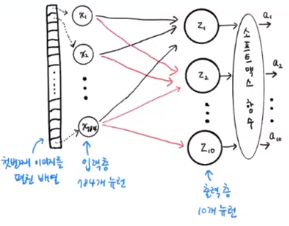

In [ ]:
# 딥러닝에서는 다양한 종류의 층을 추가하는 식으로 모델을 만듦
# 이번 장에서는 Dense 층을 사용하여 밀집층, 완전연결층(fully connected layer) 구성하며, 10개의 유닛(뉴런)을 사용함
# 다중분류이므로 활성화 함수는 소프트맥스를 사용하며, 입력값은 784개의 원소로 이루어진 1차원 배열로 구성됨
# 이진분류일 경우에는 시그모이드 함수 사용

# 케라스는 첫번쨰 층에 입력크기에 넣어야하며, 그 다음 추가되는 층은 자동으로 계산되기 때문에 입력할 필요 없음
    # -> 케라스 모델은 Sequential 클래스로 만듦

# 인공신경망의 오른쪽에 놓은 층을 만들고, 10개의 패션아이템을 분류하기 위해서 10개의 뉴런으로 구성
# 케라스의 레이어 패키지 안에는 다양한 층이 존재하며, 가장 기본이 되는 층이 밀집층(dense layer)이라함
    # 밀집층(dense layer) : 784개의 픽셀과 10개의 뉴런이 모두 연결된 선이라는 의미
# 이런 층을 뉴런이 모두 연결하고 있어 완전연결층(fully connected layer)라고 부름

In [ ]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784, ))
# 10 : 뉴런개수 / activation : 뉴런에 적용할 함수 / input_shape : 입력값의 크기
# activation 값이 'softmax' : 출력되는 값을 확률로 바꿈 -> 다중분류 / 'sigmoid' : dlwlsqnsfb
# 입력값의 크기는 10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 지정함

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 밀집층을 가진 신경망 모델 구성
model = keras.Sequential([dense])
# 밀집층을 가진 신경망 모델 구성 / Sequential(순차적구조) 클래스 사용
# Sequential 클래스의 객체를 만들때 앞에서 만든 밀집층의 객에 dense를 전달 -> model객체가 신경망 모델임

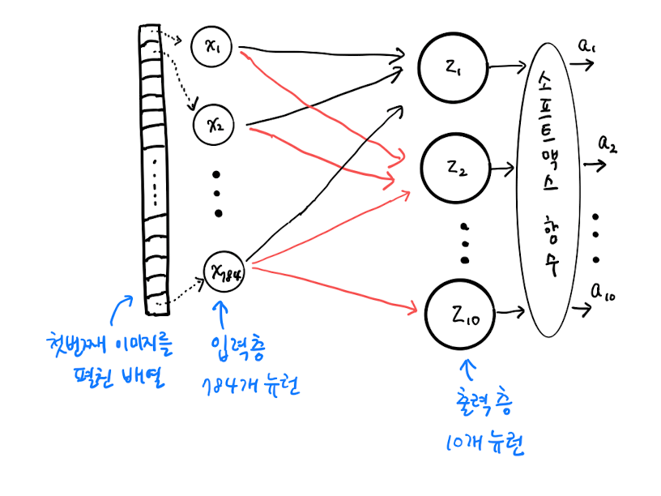

In [ ]:
# 소프트맥스와 같이 뉴런의 선형 방정식 계산결과에 적용되는 함수를 활성화 함수라 함
# 위 그림을 보면 a로 표시

# 인공신경망으로 패션아이템 분류

# 케라스 모델 훈련전 설정
# model 객체의 compile() 매서드에서 수행
# 손실함수 loss = 'sparse_categorical_crossentropy' (희소 다중분류 손실 함수) -> 정수 타깃
#                 'sparse_binary_crossentropy' (희소 이진분류 손실 함수) -> 이진 타깃
# 측정값 metrics = ['accuracy'] -> 정확도(accuracy)의 지표가 됨
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 케라스는 자동으로 에포크마다 손실을 기록함 / 추가로 정확도를 기록하기 위해 metrics 사용

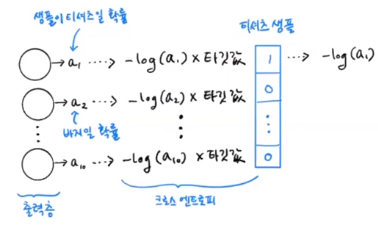
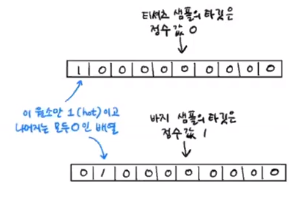

In [ ]:
print(train_target[:10])    # 정수형으로 타깃 생성되어 있음 -> 원핫 인코딩

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs = 5)    # 훈련시작 / epochs = 5 : 훈련횟수

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8537 - loss: 0.4337


In [ ]:
# 에포크마다 걸린시간, 정확도(accuracy), 손실(loss) / 0.8537로 높은 점수를 받음

# 케라스 모델의 성능 평가하는 매서드 evaluate 사용
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

In [ ]:
# 사이킷런과 케라스 모델 비교

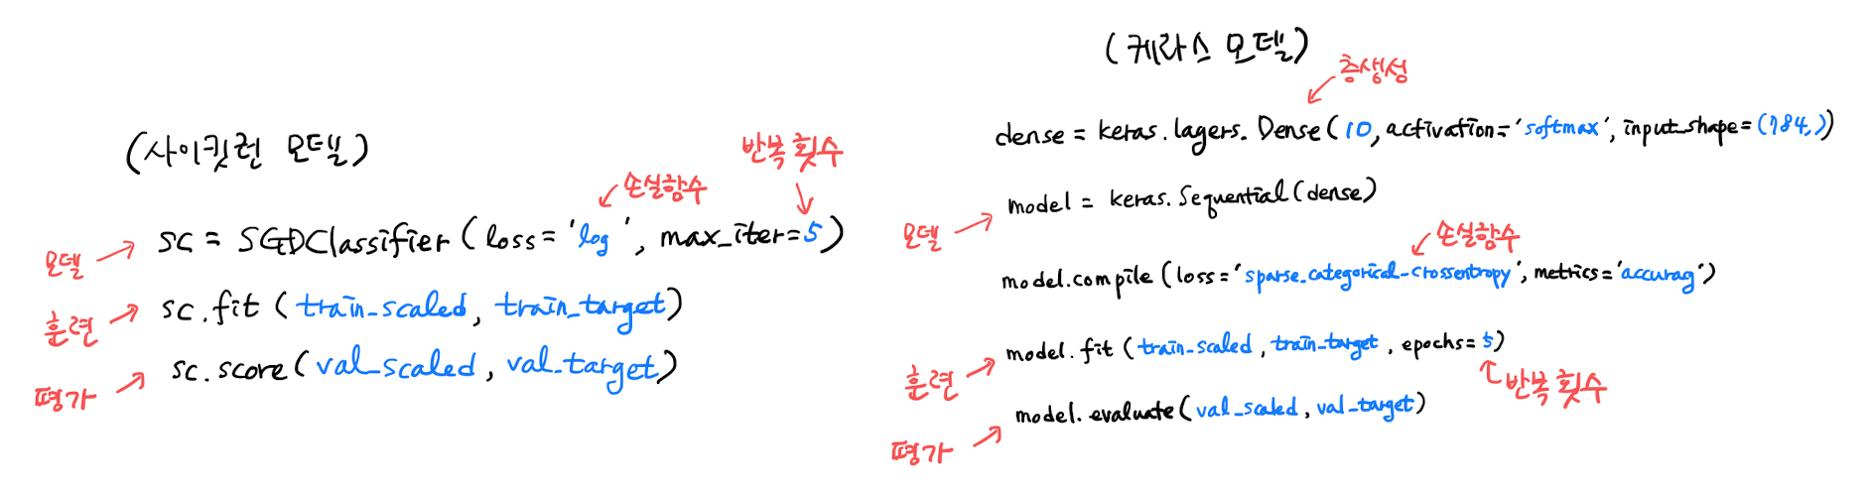